In [ ]:
#pip install imblearn

In [1]:
import pandas as pd
import openpyxl as openpyxl
import random 
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

C:\Users\uffeb\AppData\Local\Temp\ipykernel_31136\483207878.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import os
os.getcwd()

'c:\\Users\\uffeb\\OneDrive - Aarhus universitet\\Kandidat\\Master\\Speciale\\Speciale---Stibo\\Speciale---Stibo'

In [3]:
pip install ucimlrepo 

Note: you may need to restart the kernel to use updated packages.


In [4]:
## Loading the ADULT dateset from UCI repo 
#Avaliable at https://archive.ics.uci.edu/dataset/2/adult
import ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features # Importing all features 
y = adult.data.targets # Importing target varialbes

In [5]:
y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

C:\Users\uffeb\AppData\Local\Temp\ipykernel_31136\58768420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


In [6]:
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

In [7]:
data =  pd.concat([X, y], axis=1)

In [8]:
# Checking the data types of all the columns
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [9]:
## Converting the Predictor Variable into Numeric 
data['income']=data['income'].map({'<=50K':0,'>50K':1})
data['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [10]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
# Count occurrences of x in each column
for col in data:
    count = (data[col] == '?').sum()
    print(f"Number of values equal to {'?'} in column {col}: {count}")

Number of values equal to ? in column age: 0
Number of values equal to ? in column workclass: 1836
Number of values equal to ? in column fnlwgt: 0
Number of values equal to ? in column education: 0
Number of values equal to ? in column education-num: 0
Number of values equal to ? in column marital-status: 0
Number of values equal to ? in column occupation: 1843
Number of values equal to ? in column relationship: 0
Number of values equal to ? in column race: 0
Number of values equal to ? in column sex: 0
Number of values equal to ? in column capital-gain: 0
Number of values equal to ? in column capital-loss: 0
Number of values equal to ? in column hours-per-week: 0
Number of values equal to ? in column native-country: 583
Number of values equal to ? in column income: 0


In [12]:
data[data == '?'] = np.nan

In [13]:
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [14]:
data = data.dropna()

In [15]:
data=pd.get_dummies(data, drop_first = True)

In [16]:
from sklearn.model_selection import train_test_split

y = data['income'].values
features = [col for col in data.columns if col not in ['income']]
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

In [ ]:
#from sklearn import preprocessing

#categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
#for feature in categorical:
#        le = preprocessing.LabelEncoder()
#        X_train[feature] = le.fit_transform(X_train[feature])
#        X_test[feature] = le.transform(X_test[feature])

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'max_depth': [10], ##[2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt'], #['sqrt'],
    'min_samples_leaf': [10], #[10, 15, 20, 25, 30],
    'min_samples_split': [5], #[5, 10, 15, 20],
    'n_estimators': [40], #[10, 15, 20, 30, 40, 50]
    }

# Initialize the RandomForestClassifier (you can choose any other classifier)
classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
n_estimators = 100
grid_search_rf = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)


# Use the best model for predictions
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
y_pred_rf_df = pd.DataFrame(best_model_rf.predict(X_test), columns=['Predictions'])

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 40}


In [75]:
# Optionally, you can print accuracy and classification report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8485295201592098
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90     10205
           1       0.80      0.52      0.63      3362

    accuracy                           0.85     13567
   macro avg       0.83      0.74      0.77     13567
weighted avg       0.84      0.85      0.84     13567



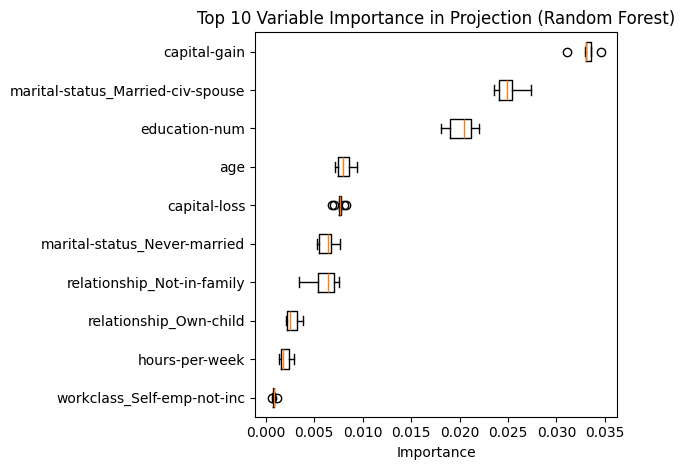

In [123]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for the permutation importances
importance_df = pd.DataFrame(result_rf.importances[sorted_idx_rf].T, columns=feature_names[sorted_idx_rf])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=importance_df, orient='h')
plt.title("Top 10 Variable Importance in Projection (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [124]:
# Save the plot as PNG
plt.savefig("vip_plot.png", format="png")

<Figure size 640x480 with 0 Axes>

In [137]:
# Get the first observation from the test set
first_observation = X_test.iloc[[0]]

# Predict the class label for the first observation
prediction = best_model_rf.predict(first_observation)

# Get the predicted probabilities for each class for the first observation
probabilities = best_model_rf.predict_proba(first_observation)

# Print the prediction and probabilities
print("Prediction:", prediction)
print("Probabilities:")
for class_index, class_probability in enumerate(probabilities[0]):
    print(f"Class {best_model_rf.classes_[class_index]}: {class_probability:.2f}")


Prediction: [0]
Probabilities:
Class 0: 0.53
Class 1: 0.47


In [76]:
basedata = X_test.copy()

In [78]:
basedata['Actual Class'] = y_test
basedata['Prediction'] = y_pred_rf

In [79]:
basedata

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,Actual Class,Prediction
46470,30,264351,13,0,0,25,False,True,False,False,...,False,False,False,False,False,False,False,False,0,0
5096,65,323006,9,0,0,25,True,False,False,False,...,False,False,False,False,False,True,False,False,0,0
16668,37,348960,12,0,0,50,False,False,False,True,...,False,False,False,False,False,True,False,False,1,0
48825,64,136405,9,0,0,32,False,False,False,True,...,False,False,False,False,False,True,False,False,0,0
4262,20,133352,10,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20384,35,219902,11,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,0,0
34658,22,384787,5,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,0,0
893,37,183800,13,7688,0,50,False,True,False,False,...,False,False,False,False,False,True,False,False,1,1
26557,42,182302,9,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,0,0


In [80]:
# Check for missing values
if basedata.isna().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [83]:
basedata.to_csv('basedata.csv', index=False)

## Model explainability - Local and Global interpretations

In [84]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


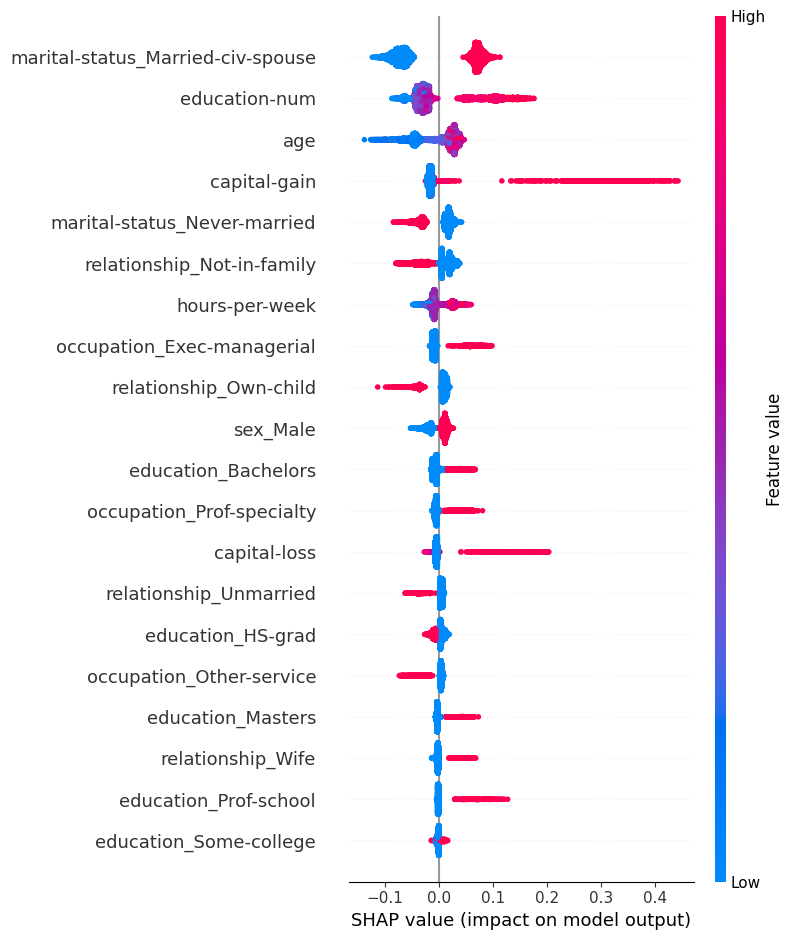

In [86]:
import shap
import matplotlib.pyplot as plt

# Create an explainer for the best model
explainer_rf = shap.Explainer(best_model_rf)

#X_test_col = X_test.columns

# Calculate SHAP values for a single prediction (change the index as needed)
#shap_values_rf = explainer_rf(X_test.iloc[1])

# Calculate SHAP values for a set of predictions
shap_values_rf = explainer_rf(X_test)

# Create an output for Churn = 1, for all X observations in the test set
shap.summary_plot(shap_values_rf[:, :, 1], X_test)

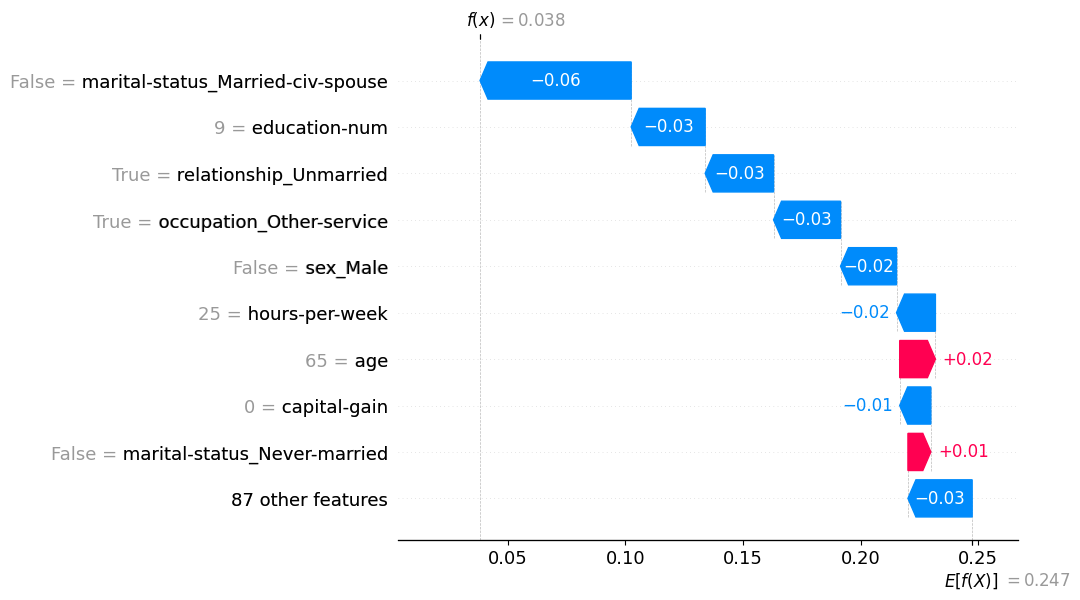

In [87]:
# Viser fordelingen af variabler for prediction i række 1, fra perspektivet churn = 0 (begge inputs kan ændres)
shap.plots.waterfall(shap_values_rf[1, :, 1])

In [102]:
# Showing a dataframe of each - 0.26 is the base value for churn = 1, for all observations. Each variable then has a SHAP-value +- the BV
shap_df = pd.DataFrame(
    np.c_[shap_values_rf[:, :, 1].base_values, shap_values_rf[:, :, 1].values],
    columns = ["Income"] + list(X_test.columns)
)

In [103]:
shap_df

,Income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.247473,-0.006508,-0.000894,0.102855,-0.018275,-0.005681,-0.033657,0.000099,0.000370,-0.000686,...,3.378473e-06,-0.000001,0.0,0.0,0.0,0.0,0.0,-0.014199,0.0,0.0
1,0.247473,0.015186,0.001135,-0.031469,-0.013235,-0.004023,-0.016537,0.002856,0.004583,-0.001100,...,-2.473400e-07,-0.000014,0.0,0.0,0.0,0.0,0.0,0.000288,0.0,0.0
2,0.247473,0.025775,0.003364,-0.027138,-0.018926,-0.006049,0.020340,-0.000882,0.007498,-0.001038,...,1.199710e-05,-0.000001,0.0,0.0,0.0,0.0,0.0,0.000925,0.0,0.0
3,0.247473,0.016869,-0.000648,-0.030525,-0.017139,-0.004205,-0.018899,0.000128,0.003301,-0.001072,...,7.681751e-07,-0.000006,0.0,0.0,0.0,0.0,0.0,0.000320,0.0,0.0
4,0.247473,-0.044365,-0.000126,-0.017828,-0.012122,-0.002964,-0.006371,-0.000054,-0.001044,-0.000420,...,7.681751e-07,-0.000002,0.0,0.0,0.0,0.0,0.0,-0.001889,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,0.247473,0.012435,0.000077,-0.022752,-0.015639,-0.003972,-0.011497,-0.000067,-0.000792,-0.000721,...,7.681751e-07,-0.000006,0.0,0.0,0.0,0.0,0.0,0.000085,0.0,0.0
13563,0.247473,-0.047016,0.000955,-0.029902,-0.013014,-0.003326,-0.008831,-0.000015,-0.001685,-0.000588,...,7.681751e-07,-0.000002,0.0,0.0,0.0,0.0,0.0,-0.003831,0.0,0.0
13564,0.247473,0.038742,0.001209,0.085972,0.255565,-0.003842,0.023182,0.000802,0.000561,-0.000567,...,9.721264e-07,-0.000001,0.0,0.0,0.0,0.0,0.0,0.000788,0.0,0.0
13565,0.247473,0.025385,0.001094,-0.040145,-0.019181,-0.005736,-0.009176,0.000135,-0.000827,-0.001086,...,2.602107e-06,-0.000002,0.0,0.0,0.0,0.0,0.0,0.000675,0.0,0.0


In [104]:
# Calculate percentages
shap_df_percentage = shap_df.div(shap_df['Income'], axis=0) * 100

In [105]:
shap_df_percentage

,Income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,100.0,-2.629886,-0.361345,41.562155,-7.384729,-2.295504,-13.600481,0.039809,0.149587,-0.277330,...,0.001365,-0.000465,0.0,0.0,0.0,0.0,0.0,-5.737761,0.0,0.0
1,100.0,6.136470,0.458567,-12.716011,-5.348146,-1.625499,-6.682436,1.153908,1.851802,-0.444467,...,-0.000100,-0.005801,0.0,0.0,0.0,0.0,0.0,0.116273,0.0,0.0
2,100.0,10.415147,1.359264,-10.966008,-7.647544,-2.444423,8.219029,-0.356465,3.029746,-0.419288,...,0.004848,-0.000533,0.0,0.0,0.0,0.0,0.0,0.373739,0.0,0.0
3,100.0,6.816518,-0.261658,-12.334834,-6.925800,-1.699026,-7.636942,0.051892,1.333761,-0.433096,...,0.000310,-0.002288,0.0,0.0,0.0,0.0,0.0,0.129249,0.0,0.0
4,100.0,-17.927341,-0.050740,-7.203889,-4.898146,-1.197818,-2.574240,-0.021966,-0.421824,-0.169575,...,0.000310,-0.000636,0.0,0.0,0.0,0.0,0.0,-0.763516,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,100.0,5.024954,0.031240,-9.193754,-6.319538,-1.605196,-4.645678,-0.026929,-0.320056,-0.291382,...,0.000310,-0.002571,0.0,0.0,0.0,0.0,0.0,0.034365,0.0,0.0
13563,100.0,-18.998543,0.385940,-12.083133,-5.258861,-1.343985,-3.568669,-0.005891,-0.680848,-0.237735,...,0.000310,-0.000813,0.0,0.0,0.0,0.0,0.0,-1.548225,0.0,0.0
13564,100.0,15.655181,0.488571,34.739980,103.270113,-1.552612,9.367390,0.324142,0.226626,-0.229048,...,0.000393,-0.000405,0.0,0.0,0.0,0.0,0.0,0.318339,0.0,0.0
13565,100.0,10.257677,0.441918,-16.222083,-7.750849,-2.317814,-3.707686,0.054589,-0.334175,-0.438904,...,0.001051,-0.000669,0.0,0.0,0.0,0.0,0.0,0.272949,0.0,0.0


In [117]:
shap_df_noincome = shap_df.copy()
shap_df_noincome.drop(columns=['Income'], inplace = True)

shap_df_percentage_noincome = shap_df_percentage.copy()
shap_df_percentage_noincome.drop(columns=['Income'], inplace = True)

In [118]:
shap_df.to_csv('shap.csv', index=False)  # Set index=False to not write row numbers as the first column
shap_df_percentage.to_csv('shap_percentage.csv', index=False)  # Set index=False to not write row numbers as the first column
shap_df_noincome.to_csv('shap_noincome.csv', index=False)  # Set index=False to not write row numbers as the first column
shap_df_percentage_noincome.to_csv('shap_percentage_noincome.csv', index=False)  # Set index=False to not write row numbers as the first column

In [ ]:
pd.DataFrame(X_test.iloc[69]).T

In [ ]:
row = 1

import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_test.columns,
                                                    discretize_continuous=True)


In [ ]:
explainer.explain_instance?

In [ ]:
# First, create a prediction on this sample
row = X_test.iloc[69]
to_predict = row.values.reshape(1, -1)

best_model_rf.predict_proba(to_predict)

In [ ]:
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_test.columns,
                                                    discretize_continuous=True)

exp = explainer.explain_instance(row, best_model_rf.predict_proba, num_features=200)
exp.show_in_notebook(show_table=True)

In [ ]:
from tqdm import tqdm  # For progress tracking

# Initialize an empty list to store individual dataframes
explanations_list = []

# Iterate over each row in the test set
for index, row in tqdm(X_test.iterrows(), total=len(X_test), desc="Generating Explanations"):
    # Reshape the row into a 2D array with a single row
    to_predict = row.values.reshape(1, -1)
    
    # Generate prediction probabilities
    prediction_proba = best_model_rf.predict_proba(to_predict)
    
    # Explain the prediction for the current row
    explanation = explainer.explain_instance(row, best_model_rf.predict_proba, num_features=200)
    
    # Create a dataframe for the current explanation
    explanation_df = pd.DataFrame({'Index': [index], 'Prediction': [prediction_proba], 'Explanation': [explanation]})
    
    # Append the dataframe to the list
    explanations_list.append(explanation_df)


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm  # For progress tracking

# Initialize an empty list to store individual dataframes
explanations_list = []

# Iterate over the first 10 rows in the test set
for index, row in tqdm(X_test.iterrows(), total=len(X_test), desc="Generating Explanations"):
    # Reshape the row into a 2D array with a single row
    to_predict = row.values.reshape(1, -1)
    
    # Generate prediction probabilities
    prediction_proba = best_model_rf.predict_proba(to_predict)
    
    # Get the predicted class (1 or 2)
    predicted_class = np.argmax(prediction_proba) + 1
    
    # Get the predicted probability
    predicted_probability = prediction_proba[0][predicted_class - 1]  # Probability for the predicted class
    
    # Explain the prediction for the current row
    explanation = explainer.explain_instance(row, best_model_rf.predict_proba, num_features=200)
    
    # Extract feature explanations
    feature_names = [f[0] for f in explanation.as_list()]
    feature_weights = [f[1] for f in explanation.as_list()]
    
    # Create a dictionary to hold feature explanations
    feature_explanations = {}
    for feature_name, feature_weight in zip(feature_names, feature_weights):
        feature_explanations[feature_name] = feature_weight
    
    # Create a dataframe for the current explanation
    explanation_df = pd.DataFrame({'Index': [index], 'Prediction': [predicted_class], 'Probability': [predicted_probability]})
    
    # Add feature explanations as separate columns
    for feature_name in feature_explanations.keys():
        explanation_df[feature_name] = feature_explanations[feature_name]
    
    # Append the dataframe to the list
    explanations_list.append(explanation_df)

# Concatenate all dataframes in the list along the row axis
explanations_df = pd.concat(explanations_list, ignore_index=True)

# Show the dataframe
print(explanations_df.head())


In [ ]:
explanations_df.head()